 1. Your views about the problem statement?
 
 Ans: To predict the salary for the employees, the variables like Previous CTC, Experience and Role will impact more or should be considered then following Graduation marks, which tier college and city candidate belongs. As the previous CTC is more or Experience is more or the role is senior/higher they should have more salary during prediction.
 
 2. What will be your approach to solving this task?

Ans: As per the problem we have to use the regression models. So, I will buid different regression models, evaluate their performance and then choose the one which is performing better or has more accuracy score compared to others. 

3. What were the available ML model options you had to perform this task?

Ans: For this task, available options were Multiple linear regression, Decision tree regressor, Random forest regressor etc.

4. Which model’s performance is best and what could be the possible reason for that?

Ans: Random Forest Regressor(RFR) model has best performance than other regression methods. I think this is because it builds multiple random trees independently and averages them out at the end of its prediction process. So, various subsets are choosen their values are predicted and then average is taken of it. Further RFR can be more reliable and accurate. Compared to decision tree regressor RFR has less chance of overfitting.I think it is as simple as comparing literally,the meaning of both words it says it all.
Decision Tree Regressor- It creates a tree to predict the output whereas,
RFR- Is a forest full of such trees, So it will be more accurate than a single tree.

5. What steps can you take to improve this selected model’s performance even further?

Ans: We can improve the hyperparameters of a random forest regressor to get the best performance on the task. We can use a grid search or a random search or bayesian optimization to find the optimal combination of hyperparameters.
Also, We can go through the feature selections again.We can increase or decrease the number of estimators. We can specify the maximum depth of the trees etc.

In [1]:
# importing needed libraries
import pandas as pd
import seaborn as sns


In [2]:
# importing  case data in data frame
df=pd.read_csv('ML case study.csv')

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [5]:
# Loading Colleges data from colleges file in dataframe
c=pd.read_csv('Colleges.csv')

In [6]:
c.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [7]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 804.0+ bytes


In [8]:
# Creating lists of tiers of colleges
Tier1=c["Tier 1"].tolist()
Tier2=c["Tier 2"].tolist()
Tier3=c["Tier 3"].tolist()

In [9]:
#Comparing and Replacing the values in College column of dataframe with 1 for tier 1,2 for tier 2 and 3 for tier 3 colleges
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)

In [10]:
# Checking for College column values to be converted to 1,2,3
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [11]:
# Loading data from cities csv file in dataframe
city=pd.read_csv('cities.csv')

In [12]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes


In [14]:
# Creating lists of metro and non metro cities
metro=city["Metrio City"].tolist()
non_metro=city["non-metro cities"].tolist()


In [15]:
metro

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [16]:
# Comparing and Replacing the values in City column of dataframe with 0 for metro and 1 for non metro cities
for item in df.City:
    if item in metro:
        df["City"].replace(item,0,inplace=True)
    elif item in non_metro:
        df["City"].replace(item,1,inplace=True)
        

In [17]:
# Checking for City column values to be converted to 0-1
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,1,Manager,55523.0,3,66,19,71406.58
1,2,1,Executive,57081.0,1,84,18,68005.87
2,3,1,Executive,60347.0,2,52,28,76764.02
3,3,1,Executive,49010.0,2,81,33,82092.39
4,1,1,Executive,57879.0,4,74,32,73878.10


In [18]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.485840,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


<Axes: xlabel='CTC', ylabel='Graduation Marks'>

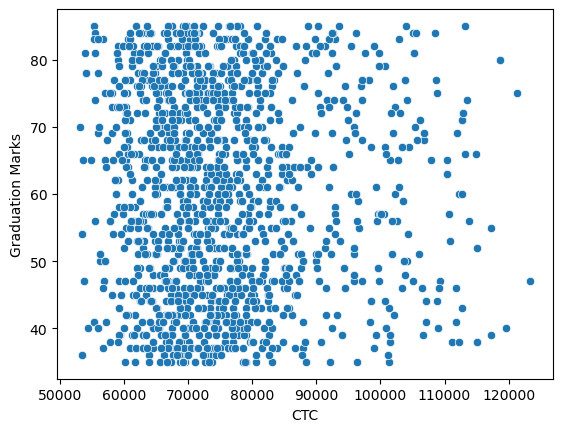

In [19]:
# Checking relation of previous CTC with experience
sns.scatterplot(x="CTC",y="Graduation Marks", data=df)

<Axes: xlabel='College', ylabel='count'>

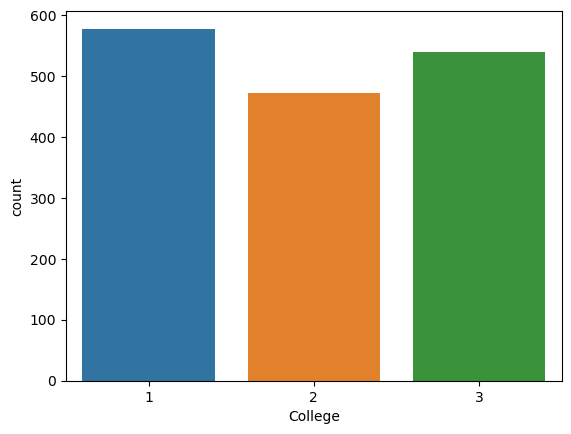

In [20]:
# Comparing number of candidates from different tier colleges
sns.countplot(x='College', data=df)

<Axes: xlabel='Previous CTC', ylabel='CTC'>

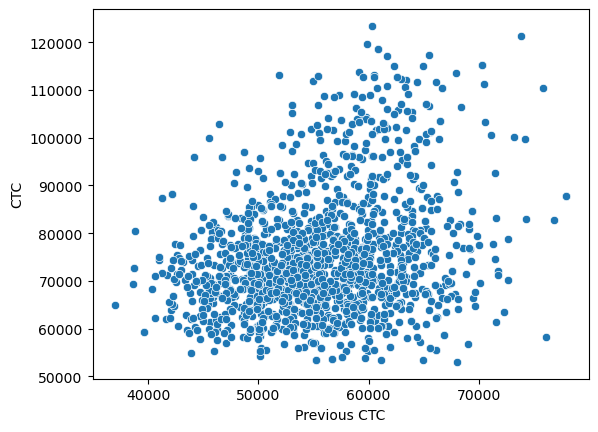

In [21]:
# Comparing relation of Previous CTC and CTC
sns.scatterplot(x="Previous CTC",y="CTC", data=df)

<Axes: xlabel='Role', ylabel='count'>

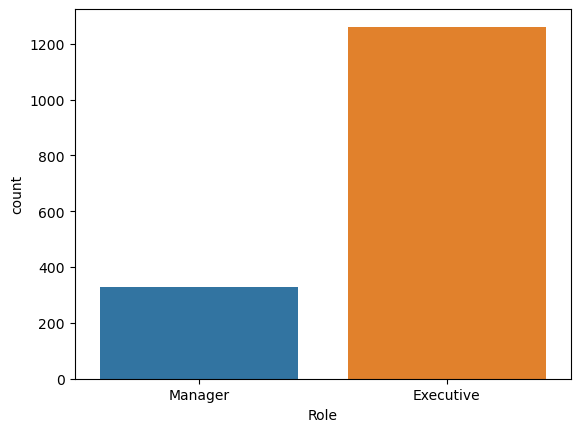

In [22]:
#Comparing number of candidates in two roles
sns.countplot(x='Role', data=df)

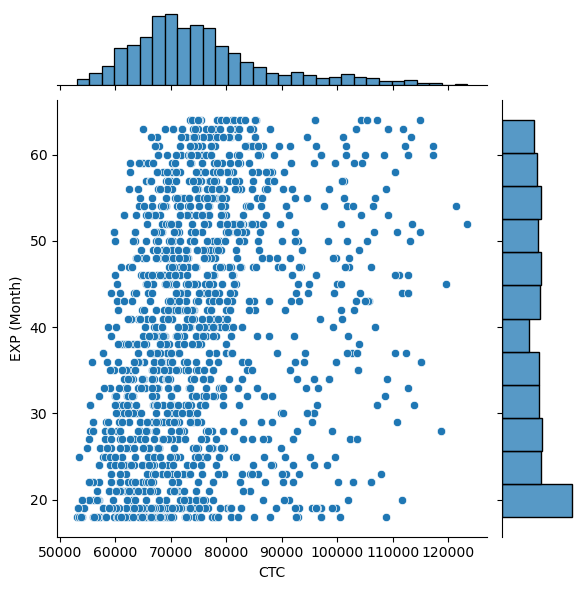

In [23]:
sns.jointplot(x='CTC', y='EXP (Month)',data=df)

In [24]:
# Creating dummies for column Role
df=pd.get_dummies(df)

In [25]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,1,55523.0,3,66,19,71406.58,False,True
1,2,1,57081.0,1,84,18,68005.87,True,False
2,3,1,60347.0,2,52,28,76764.02,True,False
3,3,1,49010.0,2,81,33,82092.39,True,False
4,1,1,57879.0,4,74,32,73878.10,True,False


In [26]:
df['Role_Executive'] = (df['Role_Executive'] == True ).astype(int)
df ['Role_Manager'] = (df ['Role_Manager'] == True ).astype(int)

In [27]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,1,55523.0,3,66,19,71406.58,0,1
1,2,1,57081.0,1,84,18,68005.87,1,0
2,3,1,60347.0,2,52,28,76764.02,1,0
3,3,1,49010.0,2,81,33,82092.39,1,0
4,1,1,57879.0,4,74,32,73878.10,1,0


In [28]:
del df["Role_Executive"]

In [29]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,1,55523.0,3,66,19,71406.58,1
1,2,1,57081.0,1,84,18,68005.87,0
2,3,1,60347.0,2,52,28,76764.02,0
3,3,1,49010.0,2,81,33,82092.39,0
4,1,1,57879.0,4,74,32,73878.10,0


In [30]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


In [31]:
del df["Previous job change"]

In [32]:
df.head()

,College,City,Previous CTC,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,1,55523.0,66,19,71406.58,1
1,2,1,57081.0,84,18,68005.87,0
2,3,1,60347.0,52,28,76764.02,0
3,3,1,49010.0,81,33,82092.39,0
4,1,1,57879.0,74,32,73878.10,0


# Multiple Linear Regression Model

In [33]:
# Multiple linear regression using sklearn
from sklearn.linear_model import LinearRegression

In [34]:
X_multi=df.drop("CTC",axis=1)

In [35]:
y_multi=df["CTC"]

In [36]:
lm=LinearRegression()

In [37]:
lm.fit(X_multi,y_multi)

LinearRegression()

In [38]:
print(lm.intercept_,lm.coef_)

39119.06774414462 [-4.90871062e+02 -3.95368431e+02  4.10212458e-01  6.44890457e+00
  2.61601770e+02  1.94820654e+04]


In [39]:
#Multiple linear regression using statsmodel
import statsmodels.api as sn

In [40]:
X_multi_cons=sn.add_constant(X_multi)

In [41]:
X_multi_cons

,const,College,City,Previous CTC,Graduation Marks,EXP (Month),Role_Manager
0,1.0,2,1,55523.0,66,19,1
1,1.0,2,1,57081.0,84,18,0
2,1.0,3,1,60347.0,52,28,0
3,1.0,3,1,49010.0,81,33,0
4,1.0,1,1,57879.0,74,32,0
...,...,...,...,...,...,...,...
1584,1.0,1,0,61285.0,44,60,0
1585,1.0,1,1,63140.0,44,24,0
1586,1.0,1,0,44907.0,60,19,0
1587,1.0,1,1,52054.0,67,29,0


In [42]:
lm_multi=sn.OLS(y_multi,X_multi_cons).fit()

In [43]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     302.4
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          3.21e-258
Time:                        11:04:20   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1582   BIC:                         3.335e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.912e+04   2135.801     18.316      0.000    3.49e+04    4.33e+04
College           -490.8711    257.941     -1.903      0.057    -996.814      15.072
City              -395.3684    432.811     -0.913      0.361   -1244.312     453.575
Previous CTC         0.4102      0.033     12.533      0.000       0.346       0.474
Graduation Marks     6.4489     14.495      0.445      0.656     -21.983      34.881
EXP (Month)        261.6018     15.452     16.929      0.000     231.292     291.911
Role_Manager      1.948e+04    534.535     36.447      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       50.414   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.205
Skew:                           0.411   Prob(JB):                     6.24e-13
Kurtosis:                       3.418   Cond. No.                     5.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#Multiple linear regression using sklearn
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X_multi,y_multi,test_size=0.2,random_state=0)

In [46]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 6) (318, 6) (1271,) (318,)


In [47]:
lm_a=LinearRegression()

In [48]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [49]:
y_test_a=lm_a.predict(X_test)

In [50]:
y_train_a=lm_a.predict(X_train)

In [51]:
# checking the performance of model by r2 score
from sklearn.metrics import r2_score

In [52]:
r=r2_score(y_test,y_test_a)
print(f'R-squared: {r}')

R-squared: 0.535309431142317


In [53]:
# Using ridge regression to improve the model performance
from sklearn import preprocessing

In [54]:
# standardising the data
scaler=preprocessing.StandardScaler().fit(X_train)

In [55]:
X_train_s=scaler.transform(X_train)

In [56]:
X_test_s=scaler.transform(X_test)

In [57]:
#ridge regression
from sklearn.linear_model import Ridge

In [58]:
# Tried running for alpha 0.2,0.3 but 0.1 gives better results
lm_r=Ridge(alpha=0.1)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.1)

In [59]:
pred=lm_r.predict(X_test_s)

In [60]:
R=r2_score(y_test,pred)
print(f'R-squared: {R}')

R-squared: 0.5353066402818812


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


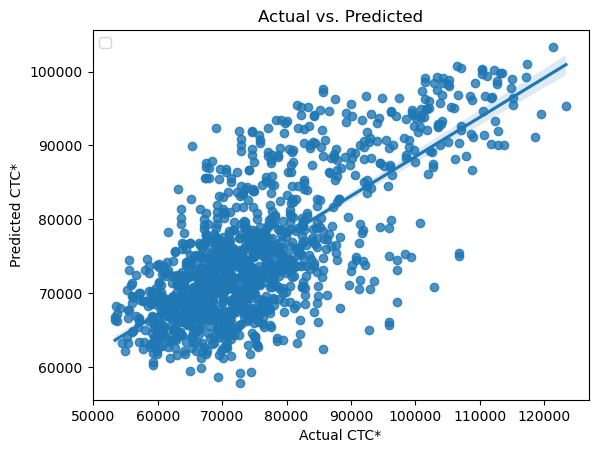

In [61]:
import matplotlib.pyplot as plt
sns.regplot(data=df,x=y_train, y= y_train_a)

plt.xlabel('Actual CTC*')
plt.ylabel('Predicted CTC*')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")


# Decision tree regressor model

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X=df.loc[:,df.columns!="CTC"]

In [64]:
y=df.CTC

In [65]:
type(y)

pandas.core.series.Series

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
X_train.head()

,College,City,Previous CTC,Graduation Marks,EXP (Month),Role_Manager
1062,1,1,61410.0,83,59,1
215,1,0,59781.0,46,41,0
654,1,1,62521.0,70,59,0
55,1,1,66624.0,63,58,1
1187,3,1,54621.0,52,62,0


In [69]:
X_train.shape

(1271, 6)

In [70]:
X_test.shape

(318, 6)

In [71]:
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=4)

In [72]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [73]:
y_train_pred=regtree.predict(X_train)
y_test_pred= regtree.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error,r2_score

In [75]:
mean_squared_error(y_test, y_test_pred)

58601838.897289276

In [76]:
r2_score(y_train,y_train_pred)


0.6390035119871922

In [77]:
r2=r2_score(y_test, y_test_pred)
print(f'R-squared: {r2}')

R-squared: 0.6050674173957374


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


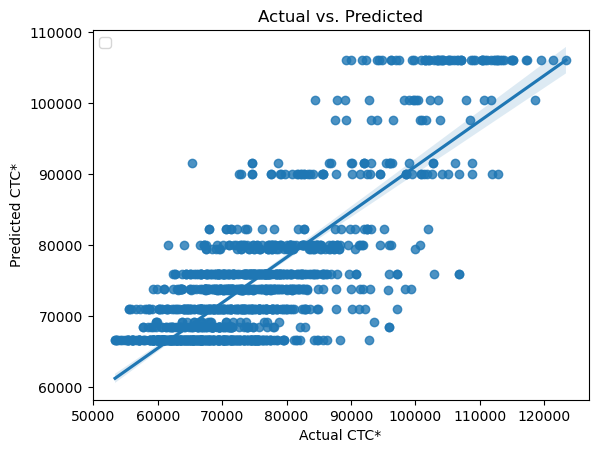

In [78]:
sns.regplot(data=df,x=y_train, y= y_train_pred)

plt.xlabel('Actual CTC*')
plt.ylabel('Predicted CTC*')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

# Random Forest Regressor Model

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf_reg=RandomForestRegressor(n_estimators=1000,random_state=42,oob_score=True)

In [81]:
rf_reg.fit(X,y)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=42)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
predictions = rf_reg.predict(X)

In [84]:
mse = mean_squared_error(y, predictions)

In [85]:
# OOB score estimates the model’s generalization performance.
oob_score = rf_reg.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.6550692900626651


In [86]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7395828.556932041


In [87]:
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9532915043825876


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


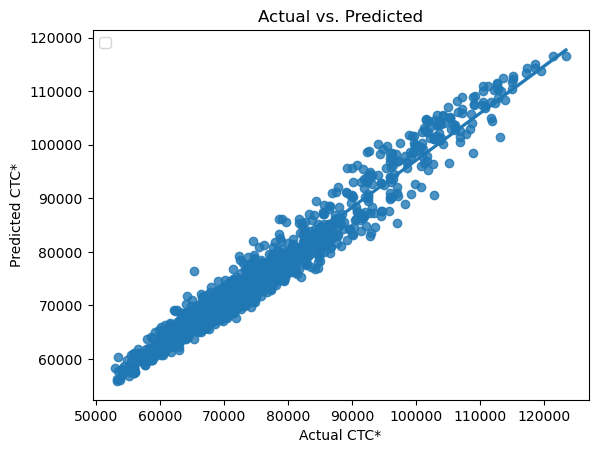

In [88]:
sns.regplot(data=df,x=y, y= predictions)

plt.xlabel('Actual CTC*')
plt.ylabel('Predicted CTC*')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

# Random Forest Regressor Model  = r2 score = 0.95329 = 95.32%

# Decision Tree Regressor Model =  r2score = 0.60506 = 60.50%

#  Multiple Linear Regression Model = r2 score = 0.5353 = 53.53%

I will choose this model for given task.
Random Forest Regressor Model = r2 score = 0.95329 = 95.32% 


In [89]:
#pip install pydotplus

In [90]:
#pip install GraphViz